In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 16, 9

In [2]:
df = pd.read_csv('PB_Climate_Data.csv')
df.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT09,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV03,WV20
0,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/1/2000,6.49,1300.0,1601.0,0.0,0.0,0.0,68.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/2/2000,6.49,1205.0,1307.0,0.0,0.0,0.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/3/2000,10.51,1055.0,1115.0,0.0,0.0,0.0,74.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/4/2000,8.50,1425.0,1454.0,0.0,0.0,0.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/5/2000,9.40,1532.0,1509.0,0.0,0.0,0.0,69.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(8064, 34)

In [22]:
df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64

In [23]:
df = df.dropna(axis='columns', how ='all')
df.isnull().sum().sum()

0

In [6]:
df.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT09,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV03,WV20
0,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/1/2000,6.49,1300.0,1601.0,0.0,0.0,0.0,68.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/2/2000,6.49,1205.0,1307.0,0.0,0.0,0.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/3/2000,10.51,1055.0,1115.0,0.0,0.0,0.0,74.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/4/2000,8.50,1425.0,1454.0,0.0,0.0,0.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/5/2000,9.40,1532.0,1509.0,0.0,0.0,0.0,69.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[:, (df.isna().sum() <100)]
df.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/1/2000,6.49,0.0,78.0,58.0,80.0,90.0,15.0,17.0
1,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/2/2000,6.49,0.0,78.0,59.0,90.0,90.0,15.0,17.0
2,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/3/2000,10.51,0.0,79.0,69.0,110.0,100.0,17.0,21.0
3,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/4/2000,8.50,0.0,81.0,70.0,140.0,140.0,17.9,21.0
4,USW00012844,"WEST PALM BEACH INTERNATIONAL AIRPORT, FL US",1/5/2000,9.40,0.0,74.0,64.0,10.0,20.0,17.9,23.0


In [8]:
df.ffill(inplace=True)
df.isnull().sum().sum()

0

In [9]:
df.describe()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,9.696608,0.162927,83.661830,68.941344,149.913194,149.181548,19.324702,24.203633
std,36.800506,0.495153,6.727771,9.190821,90.108826,90.381801,4.962490,6.512914
min,1.340000,0.000000,50.000000,32.000000,10.000000,10.000000,6.900000,8.100000
25%,6.490000,0.000000,80.000000,64.000000,90.000000,90.000000,16.100000,19.900000
50%,8.500000,0.000000,85.000000,72.000000,120.000000,130.000000,18.100000,23.000000
75%,11.410000,0.070000,89.000000,76.000000,202.500000,210.000000,21.900000,28.000000
max,3008.680000,8.790000,99.000000,85.000000,360.000000,360.000000,83.000000,100.900000


In [10]:
#Drop AWND rows with speeds above 200mph
indexAge = df[df['AWND'] >= 200].index
df.drop(indexAge , inplace=True)

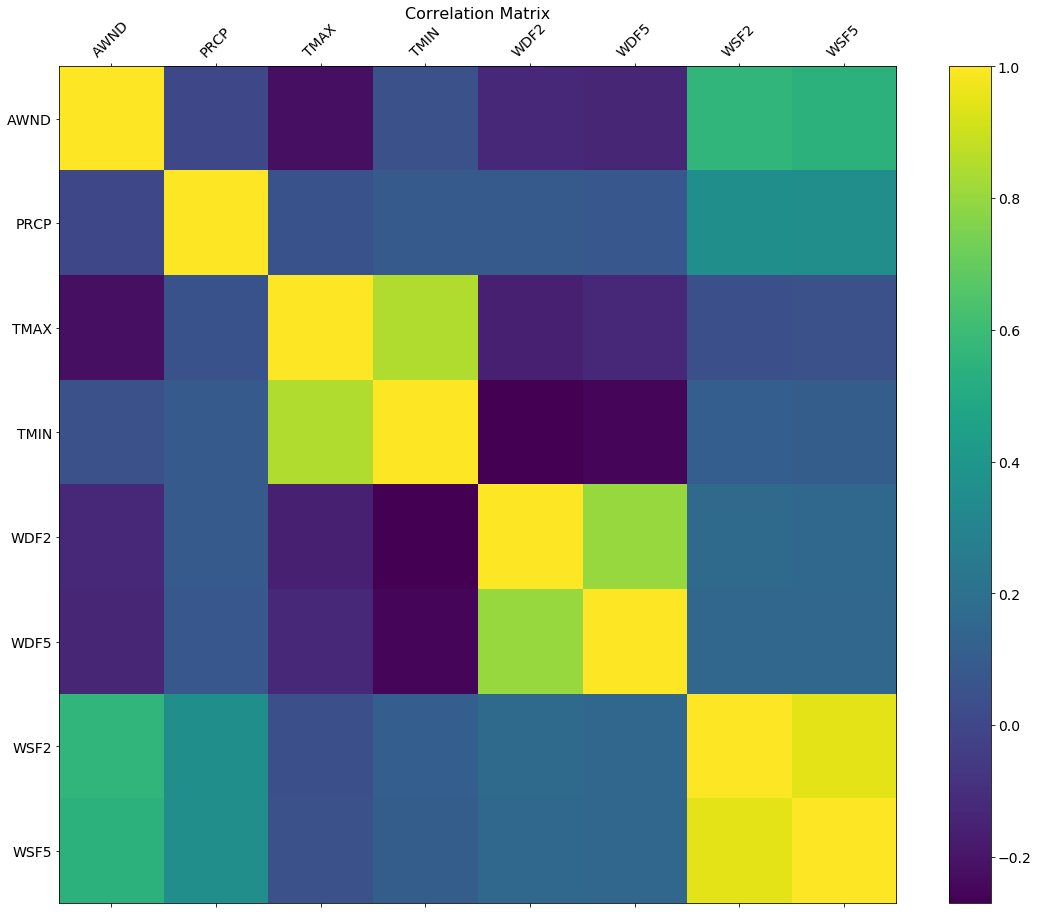

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [17]:
metadict = {'AWND':'Average Wind Speed (mph)', 'PRCP':'Precipitation (in)', 'TMAX':'Max Temp (F)', 
            'TMIN':'Min Temp (F)', 'WDF2':'Wind Direction F2 (deg)', 'WDF5':'Wind Direction F5 (deg)', 
            'WSF2':'Wind Speed F2 (mph)', 'WSF5':'WInd Speed F5 (mph)'}
metadictunits = {'AWND':'Speed (mph)', 'PRCP':'Precipitation (in)', 'TMAX':'Temp (F)', 
            'TMIN':'Temp (F)', 'WDF2':'Direction F2 (deg)', 'WDF5':'Direction F5 (deg)', 
            'WSF2':'Speed F2 (mph)', 'WSF5':'Speed F5 (mph)'}

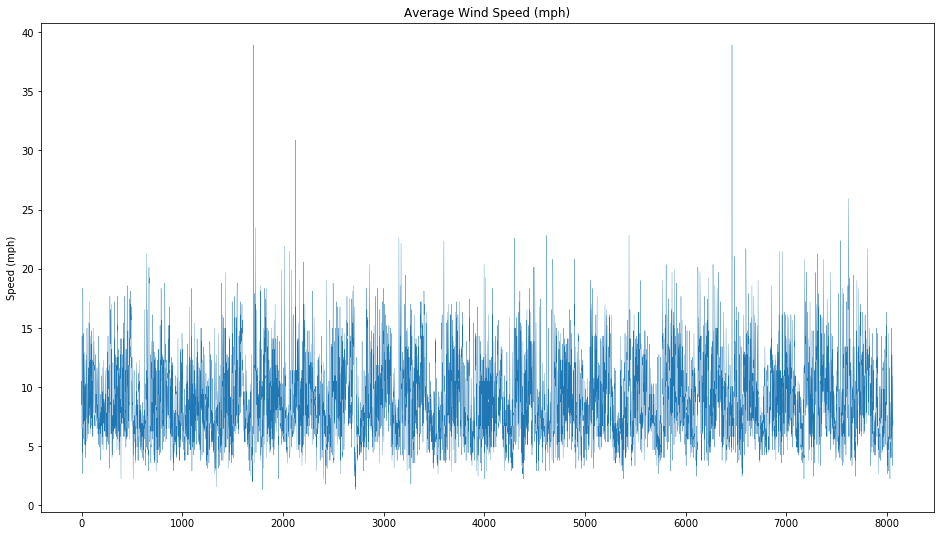

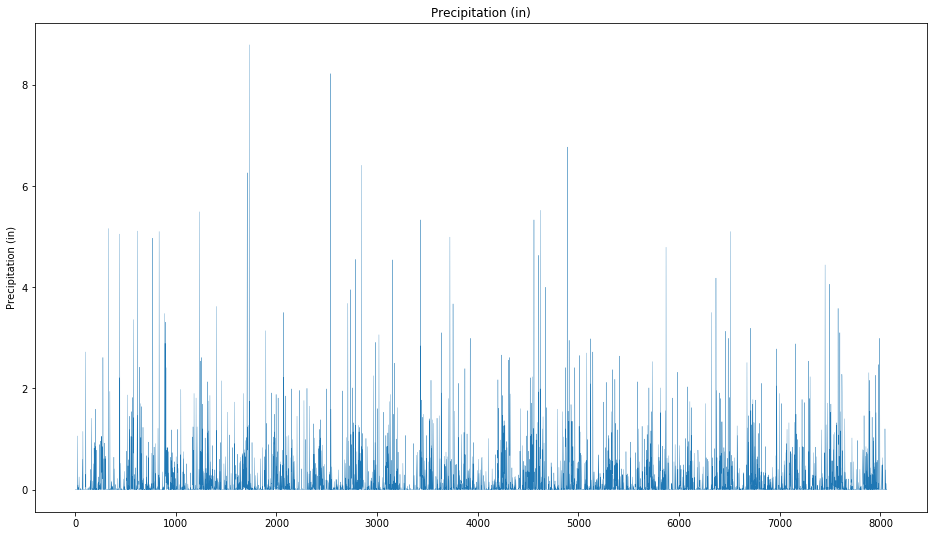

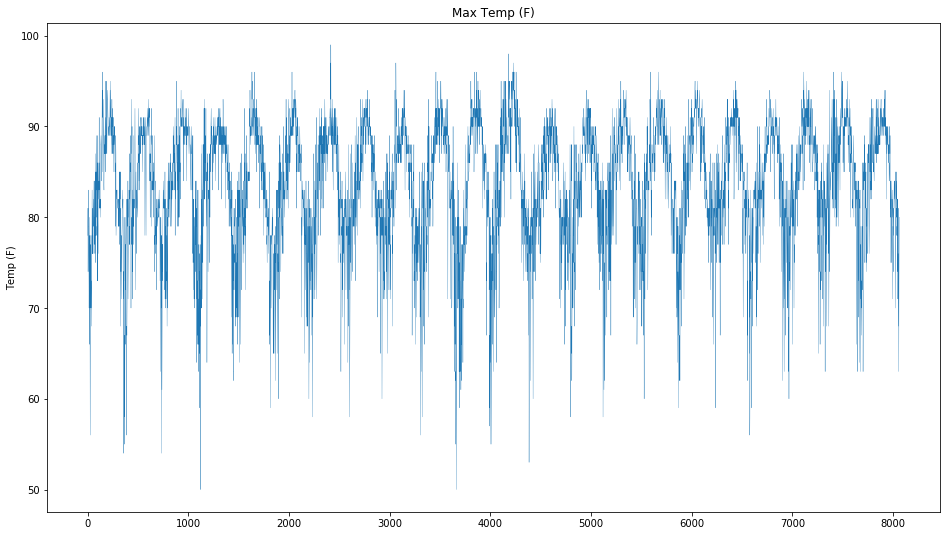

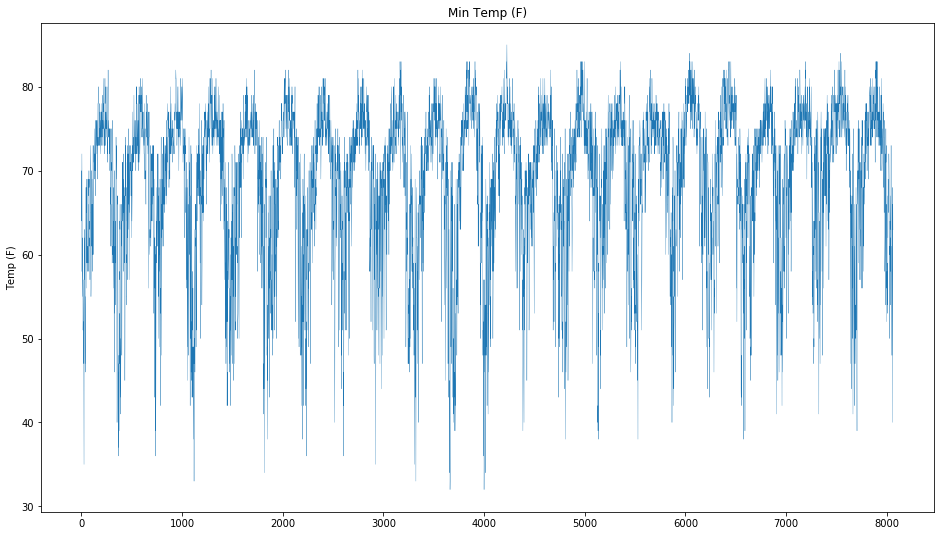

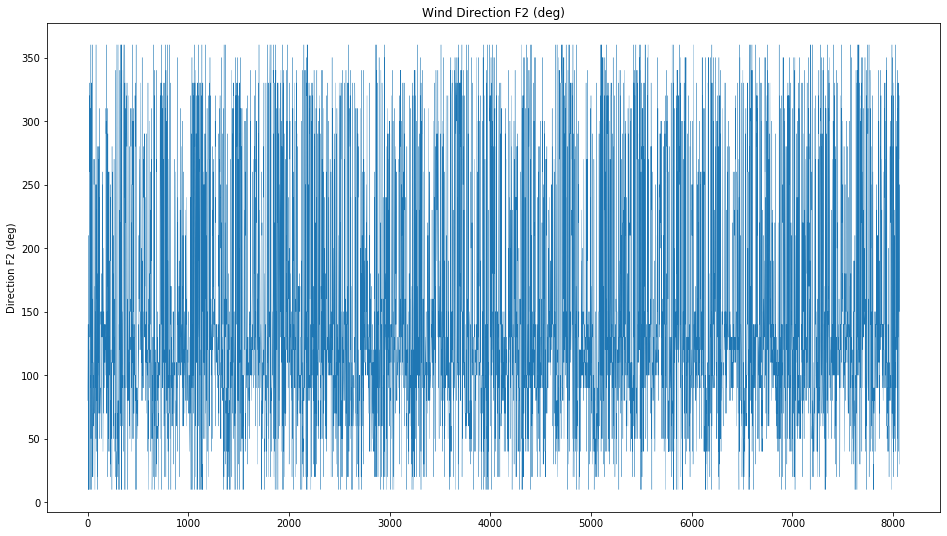

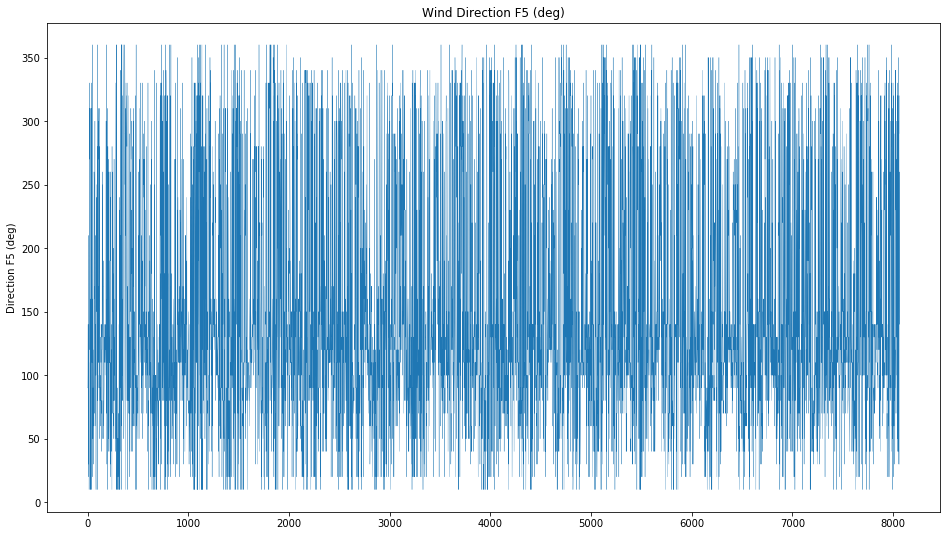

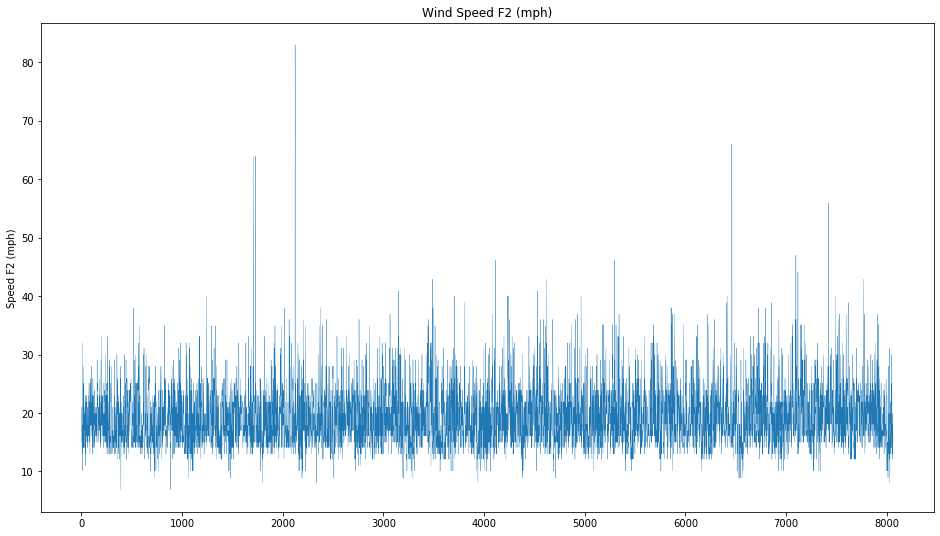

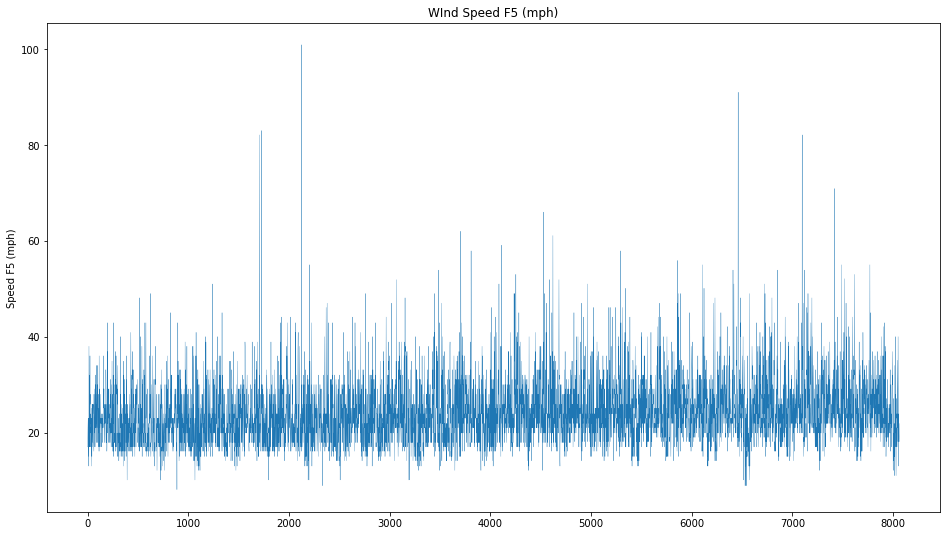

In [18]:
columnNames = list(df.iloc[:,3:])
for x in (columnNames):
    df[x].plot(linewidth=0.3)
    plt.title(metadict[x])
    plt.ylabel(metadictunits[x])
    plt.show()